In [55]:
# importing modules
import pandas_datareader.data as data
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# setting the start day and end day
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2018, 1, 1)

In [3]:
# reading of stock information from Investors Exchange (IEX) using pandas_datareader
# Bank of America
BAC = data.DataReader("BAC", "iex", start, end)

# CitiGroup
C = data.DataReader("C", 'iex', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'iex', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'iex', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'iex', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'iex', start, end)

In [4]:
BAC.head(3)

,open,high,low,close,volume
date,,,,,
2016-01-04,15.6562,15.6943,15.4658,15.6372,114888046
2016-01-05,15.7228,15.7894,15.4468,15.6372,66669974
2016-01-06,15.4087,15.5039,15.2469,15.3040,102760810


In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [6]:
# concatenate all datframes to ona dataframe
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks.head(4)

Bank Ticker      BAC                                              C           \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2016-01-04   15.6562  15.6943  15.4658  15.6372  114888046  48.1512  48.5687   
2016-01-05   15.7228  15.7894  15.4468  15.6372   66669974  48.9007  48.9672   
2016-01-06   15.4087  15.5039  15.2469  15.3040  102760810  47.5345  47.9899   
2016-01-07   14.9709  15.1327  14.6949  14.7520  116255879  46.5572  46.8513   

Bank Ticker                                ...          MS                    \
Stock Info       low    close    volume    ...        open     high      low   
date                                       ...                                 
2016-01-04   47.6199  48.5117  23440153    ...     28.5525  29.3105  28.4223   
2016-01-05   47.8286  48.2556  17444931    ...     29.2780  29.4826  28.7664   
2016-01-06   47.2119  47.5535  22501799    ...     28.4874  28.6269  28.1340   
2016-01-07   45.0676  45.1245  37902922    ...     27.7899  27.9666  26.7668   

Bank Ticker                         WFC                                       
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2016-01-04   29.2780  15749202  48.1621  48.3254  47.4455  47.9988  25985392  
2016-01-05   29.0920   9850456  48.0170  48.3231  47.6677  47.9807  14759616  
2016-01-06   28.3665  13057409  47.2822  47.7358  47.0191  47.0644  20026405  
2016-01-07   26.9528  18138205  46.2752  46.4385  45.4950  45.7218  30425557  

[4 rows x 30 columns]

In [9]:
# checking the maximum share price for all financial institutions
bank_stocks.xs(key="high",axis=1,level='Stock Info').max()

Bank Ticker
BAC     29.4879
C       75.6990
GS     258.5745
JPM    105.1767
MS      52.6998
WFC     59.9300
dtype: float64

In [10]:
# checking the minimum share price for all financial institutions
bank_stocks.xs(key="low",axis=1,level='Stock Info').min()

Bank Ticker
BAC     10.4597
C       32.7927
GS     133.3812
JPM     48.6707
MS      19.7917
WFC     40.4405
dtype: float64

In [11]:
# calculating the returns (in pct)
returns = pd.DataFrame()
for item in tickers:
    returns[item+" Return"] = bank_stocks[item]['close'].pct_change()
    

In [12]:
returns.head(5)


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.000000,-0.005279,-0.017218,0.001729,-0.006353,-0.000377
2016-01-06,-0.021308,-0.014550,-0.024412,-0.014436,-0.024938,-0.019097
2016-01-07,-0.036069,-0.051079,-0.030735,-0.040439,-0.049837,-0.028527
2016-01-08,-0.019353,-0.030066,-0.004131,-0.022400,-0.020703,-0.016666


In [20]:
returns.columns

Index(['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return',
       'WFC Return'],
      dtype='object')

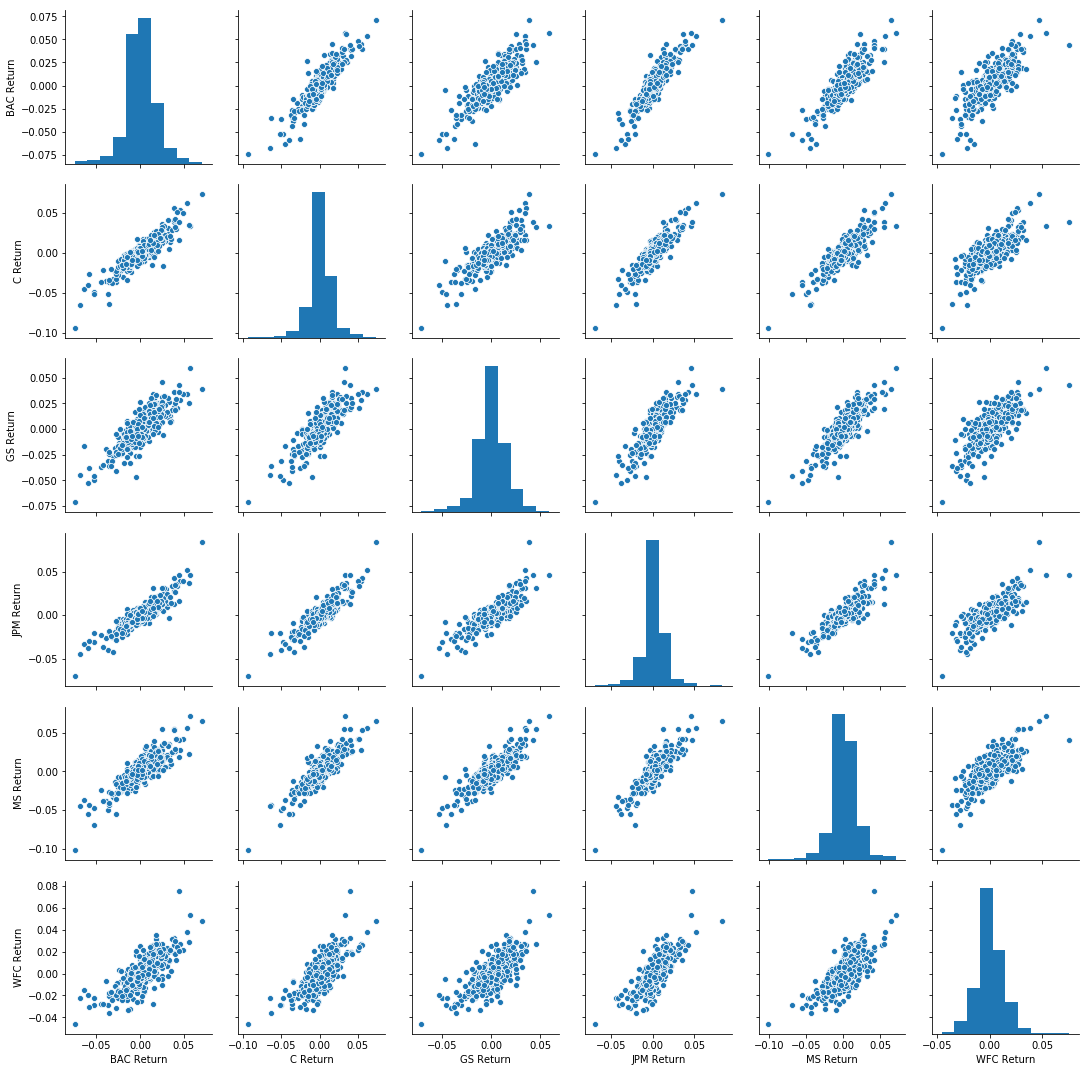

In [13]:
#checking the price relationship 1 (high correlation ?)
sns.pairplot(returns[1:])

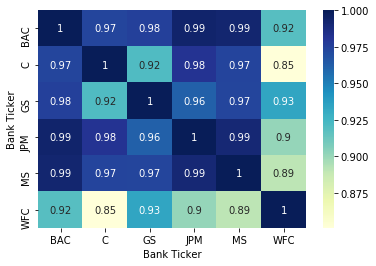

In [14]:
#checking the price relationship 2 (calculating the correlation > high correlation)
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),cmap="YlGnBu",annot=True)

In [15]:
# getting the date of the worst price drop
returns.idxmin()

BAC Return    2016-06-24
C Return      2016-06-24
GS Return     2016-06-24
JPM Return    2016-06-24
MS Return     2016-06-24
WFC Return    2016-06-24
dtype: object

In [16]:
# getting the date of the best single day gain
returns.idxmax()

BAC Return    2016-02-12
C Return      2016-02-12
GS Return     2016-11-09
JPM Return    2016-02-12
MS Return     2016-11-09
WFC Return    2016-11-10
dtype: object

In [17]:
# checking the risk level by calculating the standard deviation
returns.std()

BAC Return    0.017279
C Return      0.016181
GS Return     0.014821
JPM Return    0.013084
MS Return     0.017232
WFC Return    0.013170
dtype: float64

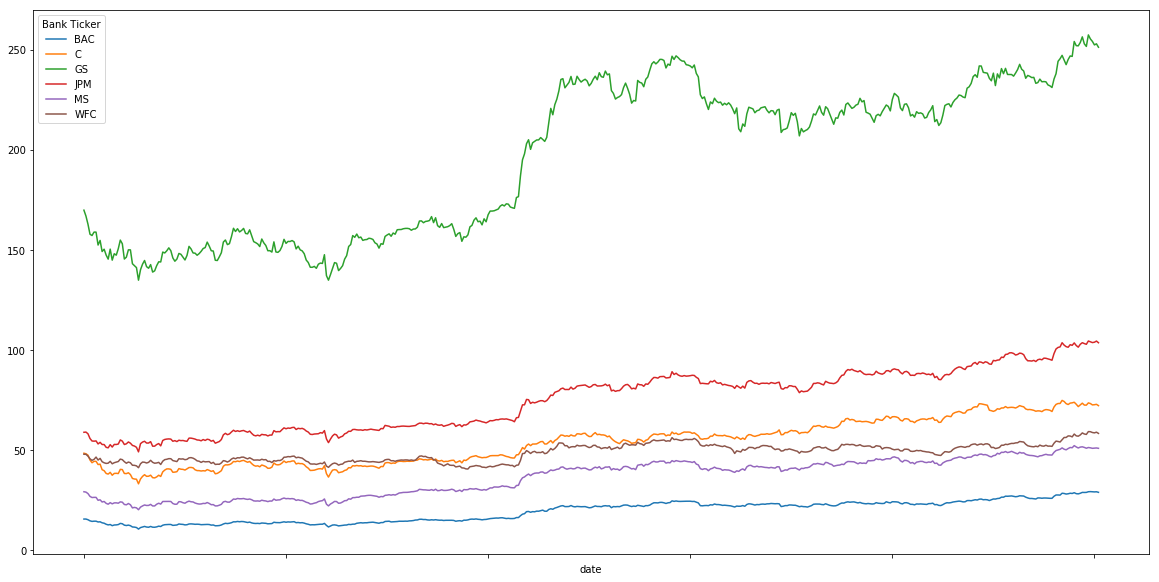

In [27]:
# ploting the price fluctuation in the specified time slot (2016-1-1 : 2018-1-1)
bank_stocks.xs(key='close',axis=1,level='Stock Info').plot(figsize=(20,10))